The NMIST training code is virtually kept the same, only refactored a bit - it made it easier to test more models, loading and testing my handwriting is after the original code.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import random

print(keras.__version__)
print(tf.__version__)

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.1.2
1.4.1


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

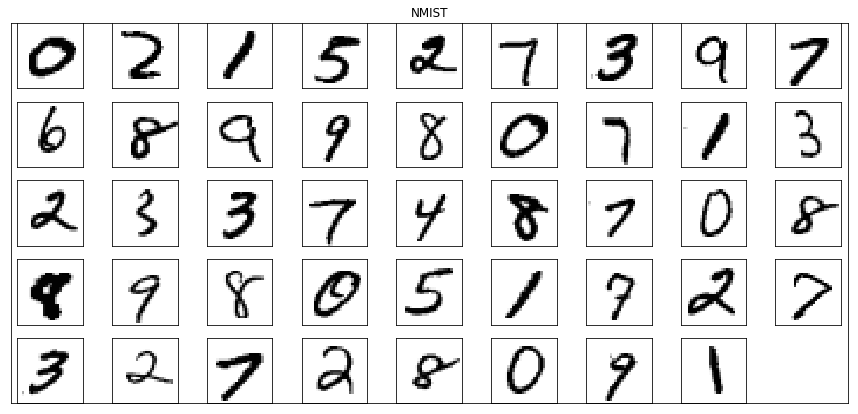

In [3]:
def show_imgs(images, columns=9, figsize=(15,7), title=''):
    fig=plt.figure(figsize=figsize)
    f = plt.title(title)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
    rows = np.ceil(len(images)/columns).astype('int')
    for i in range(1, len(images)):
        fig.add_subplot(rows, columns, i)
        f = plt.imshow(images[i], cmap=plt.cm.binary)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
    
r = random.randint(0,len(x_train)-45)
show_imgs(x_train[r:r+45].reshape(45, 28, 28), title='NMIST')

In [4]:
def make_model(neurons, activations):
    model = keras.models.Sequential()
    import collections
    zzz = zip(neurons, activations)
    n, a = next(zzz)
    model.add(keras.layers.Dense(n, input_shape=(28*28,), activation=a))
    for n, a in zzz:
        model.add(keras.layers.Dense(n, activation=a))
    model.summary()
    
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [5]:
def plot_history(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = hist.epoch

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________
Train 

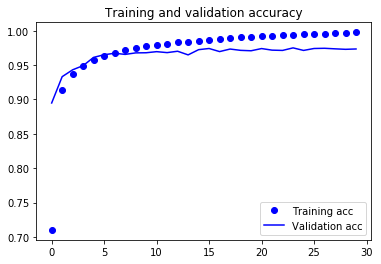

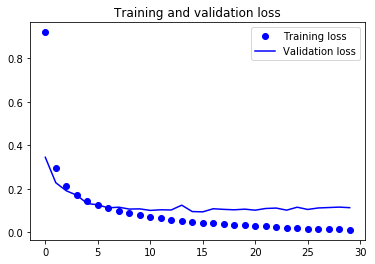

In [6]:
model = make_model((100, 50, 50, 25, 25, 10),
                   ('relu', 'relu', 'relu', 'relu', 'relu', 'softmax',))
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test,y_test))
plot_history(hist)

Here comes my handwriting

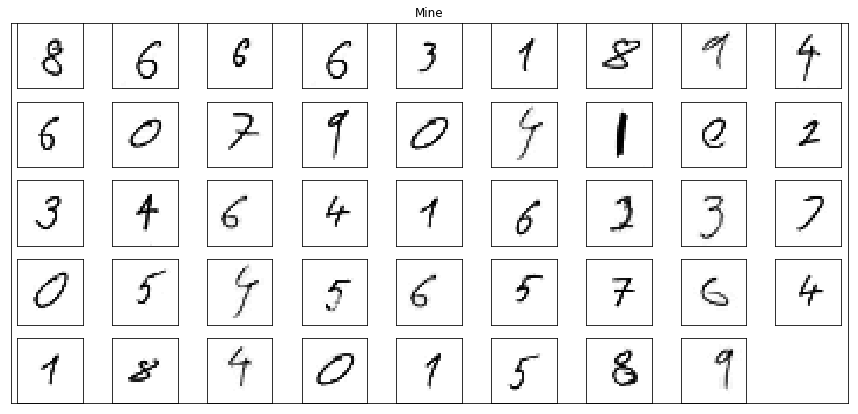

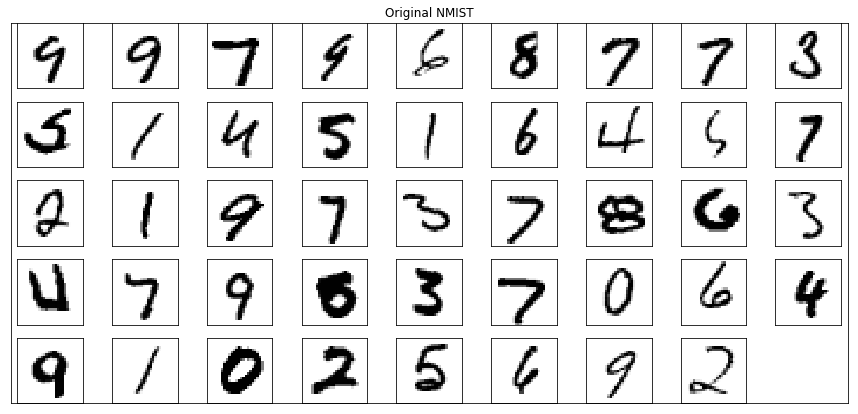

In [7]:
import os
from glob import glob
from keras.preprocessing import image
import random

PATH_TO_DS = "my-nminst-digits/first_set/"
theSIZE = (28, 28)
theLENGTH = 28*28

# will be non-empty if we are in the directory already
files = glob("*/?-*.png")
if not files and not os.path.exists(PATH_TO_DS):
    print("The dataset is not in the current directory, cloning git repo...")
    os.system("git clone https://github.com/Avatust/my-nminst-digits.git")

if not files:
    os.chdir(PATH_TO_DS)
    # again, now there should be something
    files = glob("*/?-*.png")

# let's load them
X_list = list()
Y = list()
for file in files:
    img = image.load_img(file, target_size=theSIZE, grayscale=True)
    # normalize and to np.array
    img = image.img_to_array(img).astype('float32') / 255.0
    # append
    X_list.append(img.reshape(theSIZE))
    # note what number it is
    Y.append(int(file[0]))

# I did not invert the colours while preprocessing, so now it's the time to do that
# and to put them to a numpy array, stretched to a vector
X = (1-np.array(X_list)).reshape(-1, theLENGTH)
   
show_imgs([random.choice(X).reshape(theSIZE) for i in range(45)], title='Mine')
show_imgs([random.choice(x_train).reshape(theSIZE) for i in range(45)], title='Original NMIST')

I wrote about 170 digits and I found out it wasn't so easy to process the images to be similar to the originals - the thickness especially - and I thought they should be still good enough... And regarding the values of the pixels, they are pretty close:


In [8]:
def show_vals(img):
    for r in img:
        for c in r:
            if c:
                print('{: 2.0f}'.format(c*100), end='', sep='')
            else:
                print('  ', end='', sep='')
        print()

show_vals(random.choice(X).reshape(theSIZE))
show_vals(random.choice(x_train).reshape(theSIZE))

                                                        
                                                        
                                                        
                                                        
                                                        
                                                        
                                                        
                                 2                      
                               5   2                    
                             51 82 91 88 15                  
                     2 5 73 95 93 73 42 60 94                  
                       78 85 13 2   5 24 96                  
                     2 7       2 2 65 73                  
                               2 5 90 5                  
                                 85 58 4                  
                               58 84                      
                             47 95 10 2                    
    

digit => prediction
4=>4	4=>4	4=>4	4=>4	4=>4	4=>4	4=>4	4=>5	4=>4	4=>9	4=>5	4=>4	4=>9	4=>4	4=>4	4=>4	4=>4	8=>9	8=>8	8=>9	8=>5	8=>5	8=>5	8=>9	8=>3	8=>5	8=>5	8=>5	8=>0	8=>1	8=>5	8=>9	8=>8	8=>1	2=>1	2=>2	2=>2	2=>2	2=>5	2=>2	2=>2	2=>9	2=>9	2=>3	2=>2	2=>9	2=>1	2=>2	2=>1	2=>6	2=>7	6=>4	6=>4	6=>2	6=>4	6=>6	6=>1	6=>5	6=>4	6=>9	6=>6	6=>0	6=>6	6=>6	6=>8	6=>6	6=>9	6=>1	5=>5	5=>9	5=>8	5=>5	5=>9	5=>9	5=>9	5=>5	5=>5	5=>9	5=>5	5=>9	5=>5	5=>5	5=>5	5=>5	5=>5	7=>7	7=>7	7=>3	7=>7	7=>7	7=>1	7=>7	7=>9	7=>7	7=>7	7=>9	7=>9	7=>3	7=>7	7=>7	7=>3	7=>9	1=>9	1=>7	1=>9	1=>2	1=>1	1=>1	1=>1	1=>4	1=>9	1=>9	1=>1	1=>4	1=>9	1=>1	1=>9	1=>1	1=>7	1=>1	1=>1	9=>9	9=>9	9=>1	9=>9	9=>1	9=>9	9=>9	9=>7	9=>9	9=>0	9=>9	9=>9	9=>7	9=>9	9=>1	9=>8	9=>9	0=>0	0=>0	0=>0	0=>0	0=>9	0=>9	0=>9	0=>9	0=>7	0=>4	0=>9	0=>0	0=>9	0=>0	0=>9	0=>9	0=>0	3=>3	3=>3	3=>3	3=>5	3=>9	3=>3	3=>1	3=>3	3=>1	3=>9	3=>9	3=>9	3=>7	3=>3	3=>5	3=>9	3=>9	

77 correct out of 172, that makes it 44.77% accurate.


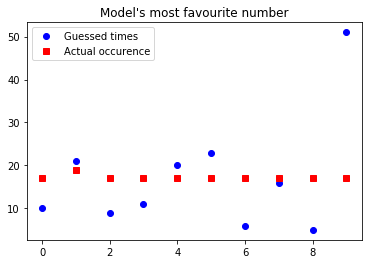

In [9]:
print("digit => prediction")
correct = 0
counter = [0]*10
for p in range(len(Y)):
    ans = model.predict(X[p].reshape((1, 784)))
    ans = np.argmax(ans)
    print("{}=>{}".format(Y[p], ans), end='\t')
    if Y[p] == ans:
        correct += 1
    counter[ans] += 1
    
print("\n\n{} correct out of {}, that makes it {:.2f}% accurate.".format(correct, len(Y), 100 * correct / len(Y)))
plt.plot(range(10), counter, 'bo', label="Guessed times")
plt.plot(range(10), [Y.count(i) for i in range(10)], 'sr', label='Actual occurence')
plt.title("Model's most favourite number")
plt.legend()
plt.show()

With diffenrent models the distribution of predictions was changing a lot - which suprises me a bit - the fact thta the models did not have similar traits when they have grown up on the same data... (Excep for number 9, that seems to be in general the most favourite one for the models). The accuracy on my handwriting ranged between 25% to 45% - and deeper models were doing a better job here.

I was also trying a differen approach - teaching 10 models to recognise a single digit (saying whether it is the number for which it has been trained or it does not think so), however, the were not so good, maybe adding a couple of more features would help, but that I will try some other time...